# Homework 7: An MITgcm Tutorial Experiment

Name: Blake Montgomery

Date: 05/07/2025

#### Overview
In class, we walked through the MITgcm tutorial for the barotropic gyre. In this homework, you'll work through another experiment - the `tutorial_global_oce_latlon` configuration. 

Documentation for this tutorial is additionally provided on the MITgcm documentation page [HERE](https://mitgcm.readthedocs.io/en/latest/examples/global_oce_latlon/global_oce_latlon.html).

Before beginning, import Python modules for manging and plotting data, and define a path to the model directory on your machine:

In [12]:
# import pertinent modules
import os
import numpy as np
import matplotlib.pyplot as plt

# define a path to the model directory
model_dir = 'C:\\Users\\Blake Montgomery\\Desktop\\CS 185C\\Homeworks\\homework_7\\MITgcm\\verification\\tutorial_global_oce_latlon'

### Part 1: Plot the model bathymetry
One good way to examine the construction of a model is to plot the bathymetry. The bathymetry for this model is stored in the `input/bathymetry.bin` file. Create a plot of the bathymetry below. Be sure to label your axes and give the plot a colorbar with a sensible color map.

Hint: The grid is stored as a 2D grid with `float32` precision. Look at the `SIZE.h` file to determine the grid shape. 

In [13]:
# variables for dimensions of the grid

n_rows = 40 # y dimension
n_cols = 90 # x dimension
dx = 4 # assuming this is the dx spacing variable
dy = 4 # assuming this is the dy spacing variable

# make an x and y grid
x = np.arange(0,n_cols*dx,dx)
y = np.arange(0,n_rows*dy,dy)
X,Y = np.meshgrid(x,y)

# print the shape of X and Y
print(np.shape(X), np.shape(Y))



(40, 90) (40, 90)


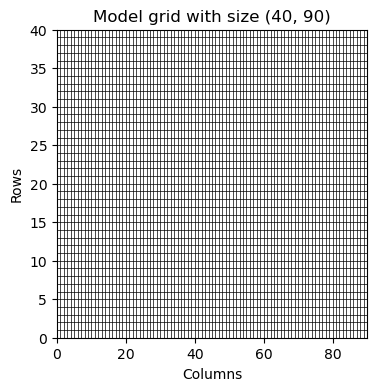

In [14]:
### USED STRICTLY FOR THE VISUALIZATION OF THE BATHYMETRY 

# define the cell edges
x_cell_edges = np.arange(n_cols+1)
y_cell_edges = np.arange(n_rows+1)

# plot the grid
fig = plt.figure(figsize = (4,4))
for i in range(n_cols+1):
    plt.plot(x_cell_edges[i]*np.ones((n_rows+1,)), y_cell_edges, 'k-', linewidth=0.5)
for j in range(n_rows+1):
    plt.plot(x_cell_edges, y_cell_edges[j]*np.ones((n_cols+1,)), 'k-', linewidth=0.5)
    
# format and show
plt.gca().set_xlim([0,n_cols])
plt.gca().set_ylim([0,n_rows])
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.title('Model grid with size ('+str(n_rows)+', '+str(n_cols)+')')
plt.show()

C:\Users\Blake Montgomery\Desktop\CS 185C\Homeworks\homework_7\MITgcm\verification\tutorial_global_oce_latlon\input\bathymetry.bin
(40, 90)


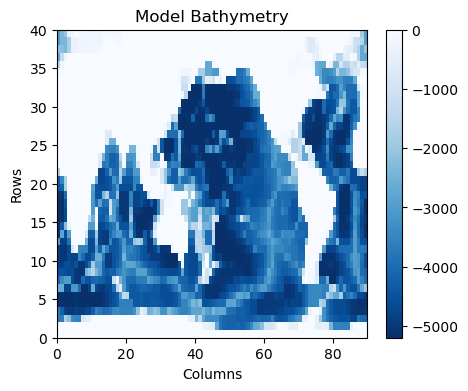

In [15]:

# read in the model bathymetry file and reshape to the grid dimensions
# define the bathymetry file
bathy_file = os.path.join(model_dir, 'input', 'bathymetry.bin')
print(bathy_file)


# read in the bathymetry grid --> this is our mathy grid file
bathy_grid = np.fromfile((bathy_file), '>f4').reshape((40, 90)) # --> np function for reading binary data.
# >f4 = big endian f4 is the notation used by 4 tran
print(np.shape(bathy_grid))


# plot the bathymetry
fig = plt.figure(figsize = (5,4))
C = plt.pcolormesh(bathy_grid, cmap='Blues_r')
plt.colorbar(C)
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.title('Model Bathymetry')
plt.show()


### Part 2: Compile the Model
Next, compile the model on your machine. 

Before you begin your compilation, make two changes to the files in the code directory:
1. In the packages.conf file, remove the lines for `mnc`, `timeave`, and `ptracers` and add a new line for `diagnostics`.
2. Remove the scripts `ptracers*.F` from the code directory.
2. Add the `DIAGNOSTICS_SIZE.h` file provided with this notebook.

Once you make these changes, compile the model code.

Refer to the class example or the [Getting Started with MITgcm](https://profmikewood.github.io/ocean_modeling_book/mitgcm/getting_started_with_MITgcm.html) section of the course notes for help.

#### Question:
How many CPUs will this model use on your machine?

Answer: it will use one CPU as my laptop only has one CPU

### Part 3: Run the Model
After your compilation is complete, run the model in the `run` directory. 

Before running this model, make the following updates to the default tutorial:
1. In the `data` file, change `nIter=0` to `nIter=70080` and place the the `pickup.0000070080.data`, `pickup.0000070080.meta`, `pickup_cd.0000070080.data` and `pickup_cd.0000070080.meta` files provided with this notebook in your run directory. This will allow you to start the model after it has already been run for several decades.
2. Update the model timesteps to run for a duration of one year. Implement this change by looking in the `data` file to determine the number of seconds for each model timesteps (`deltaTClock` HELP I THINK I MESSED THIS UP). Then, compute how many timesteps will be needed to run the model for one year by determining how many seconds are in one year (365 days) and dividing by the timestep. Then, update the timesteps on the line `nTimesteps=...,` in the `data` file.
3. In the `data` file, add a new line for `useSingleCpuIO=.TRUE.,` in the `PARM01` section just below the line that says `readBinaryPrec=32,`.
4. In the `data` file, in `PARM03`, update the following three lines as follows:
```
 pChkptFreq= 31536000.,
# dumpFreq=   864000.,
# taveFreq=   864000.,
```
   Note that the comment indicators (`#`) must be in the first column.
   
5. Add the `data.diagnostics` file provided with this notebook into your run directory. This will request the model to output monthly averages of temperature (`THETA`), salinity (`SALT`), zonal velocity (`UVEL`), and meridional velocity (`VVEL`).
6. In the file `data.pkg`, remove the line for `usePTRACERS=.TRUE.,` and add a new line for `useDIAGNOSTICS=.TRUE.,`.

After making these changes, run the model. 

Again, you can refer to the class example or the [Getting Started with MITgcm](https://profmikewood.github.io/ocean_modeling_book/mitgcm/getting_started_with_MITgcm.html) section of the course notes for help.

#### Questions:

1. What is the model timestep in seconds? days?
   ### answer: 31536000 in seconds, 365 days ran
3. How many timesteps are required to run the model for one year?
   ### the timestep would be 365, total seconds in the year is: 31536000



### Part 4: Assess the Model Results
Upon successful completion of your model run, you should have the following files: `THETA.0000070445.data`, `SALT.0000070445.data`, `UVEL.0000070445.data`, and `VVEL.0000070445.data`. These files contain the surface fields for temperature, salinity, zonal velocity, and meridional velocity in the month of December. 

Read these files into four separate grids and make a 2x2 set of subplots showing the surface temperature, salinity, zonal velocity, and meridional velocity simulated by the model. 

C:\Users\Blake Montgomery\Desktop\CS 185C\Homeworks\homework_7\MITgcm\verification\tutorial_global_oce_latlon\run\THETA.0000070445.data
(40, 90)


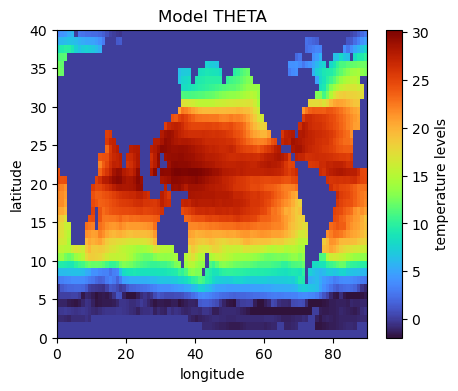

In [27]:
# read in the data from files into grids for theta, salt, uvel, and vvel

# read in the model bathymetry file and reshape to the grid dimensions
# define the bathymetry file
theta_file = os.path.join(model_dir, 'run', 'THETA.0000070445.data')
print(theta_file)


# read in the bathymetry grid --> this is our mathy grid file
theta_grid = np.fromfile((theta_file), '>f4').reshape((40, 90)) # --> np function for reading binary data.
# >f4 = big endian f4 is the notation used by 4 tran
print(np.shape(theta_grid))


# plot the theta
fig = plt.figure(figsize = (5,4))
C = plt.pcolormesh(theta_grid, cmap='turbo')
color_bar = plt.colorbar(C)
color_bar.set_label('temperature levels')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('Model THETA')
plt.show()


C:\Users\Blake Montgomery\Desktop\CS 185C\Homeworks\homework_7\MITgcm\verification\tutorial_global_oce_latlon\run\THETA.0000070445.data
(40, 90)


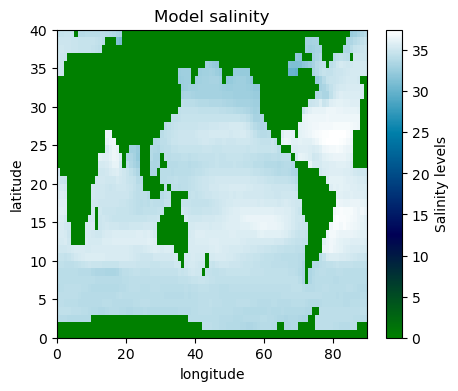

In [22]:
# read in the data from files into grids for theta, salt, uvel, and vvel

# read in the model bathymetry file and reshape to the grid dimensions
# define the bathymetry file
salt_file = os.path.join(model_dir, 'run', 'SALT.0000070445.data')
print(theta_file)


# read in the bathymetry grid --> this is our mathy grid file
salt_grid = np.fromfile((salt_file), '>f4').reshape((40, 90)) # --> np function for reading binary data.
# >f4 = big endian f4 is the notation used by 4 tran
print(np.shape(theta_grid))


# plot the salinity
fig = plt.figure(figsize = (5,4))
C = plt.pcolormesh(salt_grid, cmap='ocean')
color_bar = plt.colorbar(C)
color_bar.set_label('Salinity levels')
plt.xlabel('time')
plt.ylabel('latitude')
plt.title('Model salinity')
plt.show()



C:\Users\Blake Montgomery\Desktop\CS 185C\Homeworks\homework_7\MITgcm\verification\tutorial_global_oce_latlon\run\THETA.0000070445.data
(40, 90)


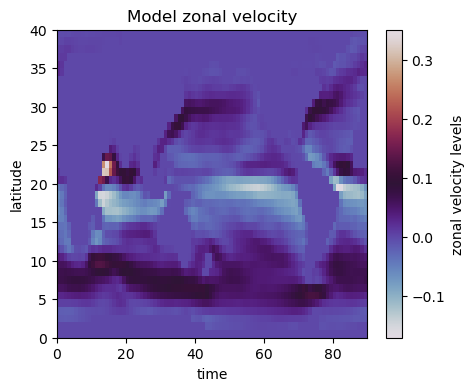

In [33]:
# read in the data from files into grids for theta, salt, uvel, and vvel

# read in the model bathymetry file and reshape to the grid dimensions
# define the bathymetry file
uvel_file = os.path.join(model_dir, 'run', 'UVEL.0000070445.data')
print(theta_file)


# read in the bathymetry grid --> this is our mathy grid file
uvel_grid = np.fromfile((uvel_file), '>f4').reshape((40, 90)) # --> np function for reading binary data.
# >f4 = big endian f4 is the notation used by 4 tran
print(np.shape(theta_grid))


# plot the uvel
fig = plt.figure(figsize = (5,4))
C = plt.pcolormesh(uvel_grid, cmap='twilight')
color_bar = plt.colorbar(C)
color_bar.set_label('zonal velocity levels')
plt.xlabel('time')
plt.ylabel('latitude')
plt.title('Model zonal velocity')
plt.show()

C:\Users\Blake Montgomery\Desktop\CS 185C\Homeworks\homework_7\MITgcm\verification\tutorial_global_oce_latlon\run\VVEL.0000070445.data
(40, 90)


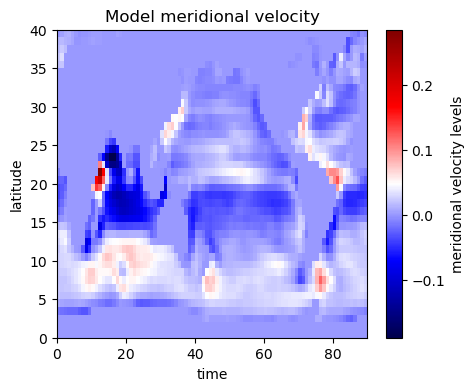

In [37]:
# read in the data from files into grids for theta, salt, uvel, and vvel

# read in the model bathymetry file and reshape to the grid dimensions
# define the bathymetry file
vvel_file = os.path.join(model_dir, 'run', 'VVEL.0000070445.data')
print(vvel_file)


# read in the bathymetry grid --> this is our mathy grid file
vvel_grid = np.fromfile((vvel_file), '>f4').reshape((40, 90)) # --> np function for reading binary data.
# >f4 = big endian f4 is the notation used by 4 tran
print(np.shape(theta_grid))


# plot the uvel
fig = plt.figure(figsize = (5,4))
C = plt.pcolormesh(vvel_grid, cmap='seismic')
color_bar = plt.colorbar(C)
color_bar.set_label('meridional velocity levels')
plt.xlabel('time')
plt.ylabel('latitude')
plt.title('Model meridional velocity')
plt.show()

#### Questions

How do these fields compare to those from Lecture 2-1 and Homework 2? What features are consistent between the models? What features are different? Identify at least two real oceanographic features simulated in this simple model of the ocean.

Answer: I feel like they are similar but defitely this is more detailed as this ran for more time 

Temperatures are consistent, but we got so much more detail in all of them!